In [2]:
import plotly.express as px

In [3]:
import pandas as pd

# df1=pd.read_excel('./old.xlsx')
# fig = px.line(df1, x="Date", y="Number of reported results", color="Type")
# fig.show()

# df2=pd.read_excel('./new.xlsx')
# fig=px.line(df2, x="Date", y="Number of reported results", color="Type")
# fig.show()

df3=pd.read_excel('./high_low.xlsx')
fig=px.line(df3, x="Date", y="Number of reported results", color="Type",
line_shape="spline",render_mode="svg")
fig.show()

df4=pd.read_excel('./compare.xlsx')
fig=px.line(df4, x="Date", y="Number of reported results", color="Type",
line_shape="spline",render_mode="svg")
fig.show()


In [4]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('./word.xlsx')

# 选择列，并将其转换为字符串
df['Word'] = df['Word'].astype(str)

# 选择五个字母单词
five_letter_words = df[df['Word'].str.len() == 5]

# 保存为新的Excel文件
five_letter_words.to_excel('five_letter_words.xlsx')

In [5]:
# 导入openpyxl库
import openpyxl
import numpy as np

# 打开Excel文件
wb = openpyxl.load_workbook('five_letter_words.xlsx')

# 获取sheet
sheet = wb.get_sheet_by_name('Sheet1')

# 设置要搜索的字母
letter = 'a'

# 初始化计数器
cnt = np.zeros([30,10])
# 遍历每一行
for i in range (0,5):
    for row in sheet.rows:
    # 获取每一行的第一个单元格的值
        word = row[1].value
        if word =='Word':
            continue
    # 检查每一行的第一个字母是否等于指定的字母
        # print(word[i])
        # print(ord(word[i])-ord('a'))
        cnt[ord(word[i])-ord('a')][i]+=1

# 计算概率
# 注意从0开始
for i in range (0,26):
    for j in range(0,5):
        cnt[i][j]/=576

# print(cnt)

dff=pd.DataFrame(cnt)
dff.to_excel('p.xlsx', index=False)

d:\Downloads\MyApp\Anaconda\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated function get_sheet_by_name (Use wb[sheetname]).



In [6]:
import heapq
import pandas as pd
import numpy as np

# 常用词集合导入
df_word=pd.read_excel('./five_letter_words.xlsx')
s=set(df_word['Word'])
df_word1=pd.read_excel('./other_word.xlsx')
s1=set(df_word1['Word'])
s1={word.lower() for word in s1}
s.update(s1)

# 计算常用五字母词各位上字母分布
# count[0][1]表示字母a在第二位的占比
count = np.zeros([30,10])
for i in range(0,5):
    for word in s:
        count[ord(word[i])-ord('a')][i]+=1

for i in range (0,26):
    for j in range(0,5):
        count[i][j]/=len(s)

# ans=pd.DataFrame(count)
# ans.to_excel('ptest.xlsx', index=False)
# print("set_size:",len(s))

# 导入游戏单词集合
df_all_word=pd.read_excel('./c.xlsx')
s_all=set(df_all_word['Word'])
s_all={word for word in s_all if len(word) == 5}
s_all={word for word in s_all if all(c in 'abcdefghijklmnopqrstuvwxyz' for c in word)}


def countVowels(str): 
    vowels = 0
    pos = 0
    cnt=1
    for i in str: 
        if (i == 'a' or i == 'e' or i == 'i' or i == 'o' or i == 'u'): 
            vowels = vowels + 1
            if pos==0:
                pos=cnt
        cnt+=1
    return [vowels,pos]

# import openpyxl module
import openpyxl

# create a new workbook
wb = openpyxl.Workbook()
# select the active sheet
sheet = wb.active
# add data to column A
i=1
sheet['A'+'1']='Word'
sheet['B'+'1']='repeat_num'
sheet['C'+'1']='usual_p_add'
sheet['D'+'1']='vowel_num'
sheet['E'+'1']='usual_or_not'
sheet['F'+'1']='1st_vowel_pos'
for word in s_all:
    i+=1
    sheet['A'+str(i)] = word
    sheet['B'+str(i)] = len(word)-len(set(word))
    arr = np.array([count[ord(word[0])-ord('a')][0],count[ord(word[1])-ord('a')][1],
    count[ord(word[2])-ord('a')][2],count[ord(word[3])-ord('a')][3],count[ord(word[4])-ord('a')][4]])
    sheet['C'+str(i)]=sum(heapq.nlargest(3, arr))
    sheet['D'+str(i)]=countVowels(word)[0]
    if word in s:
        sheet['E' + str(i)] = 1
    else:
        sheet['E' + str(i)] = 0
    sheet['F'+str(i)]=countVowels(word)[1]
# save the workbook



wb.save('feature.xlsx')


In [7]:
import pandas as pd
# 导入数据
beer = pd.read_csv('./tries.csv')
print(beer)


     kmeans++  kmeans  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0           0       0      1        3       23       39       24        9   
1           0       0      1        5       23       31       24       14   
2           2       2      1        3       13       27       30       22   
3           0       2      1        4       16       30       30       17   
4           1       1      1        9       35       34       16        5   
..        ...     ...    ...      ...      ...      ...      ...      ...   
349         0       0      0        2       17       35       29       14   
350         0       0      0        3       21       40       25        9   
351         0       0      0        2       16       38       30       12   
352         0       0      0        4       21       38       26        9   
353         0       0      0        2       17       37       29       12   

     7 or more tries (X)  
0                      1  
1                    

In [8]:

from sklearn.cluster import DBSCAN

X = beer[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]
# 设置半径为10，最小样本量为2，建模
db = DBSCAN(eps=4, min_samples=2).fit(X)

labels = db.labels_ 
beer['cluster_db'] = labels  # 在数据集最后一列加上经过DBSCAN聚类后的结果
beer.sort_values('cluster_db')

# 注：cluster列是kmeans聚成3类的结果；cluster2列是kmeans聚类成2类的结果；scaled_cluster列是kmeans聚类成3类的结果（经过了数据标准化）


,kmeans++,kmeans,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),cluster_db
182,0,0,1,6,20,27,28,16,3,-1
280,2,2,0,7,18,20,15,16,23,-1
116,1,1,6,26,32,22,10,3,0,-1
32,2,2,1,10,20,24,24,17,3,-1
320,1,1,5,13,25,27,19,10,2,-1
...,...,...,...,...,...,...,...,...,...,...
24,1,1,1,10,25,27,19,12,5,1
98,0,0,1,11,22,25,21,15,5,1
91,1,1,1,12,23,26,21,13,4,1
80,2,2,1,6,17,22,20,21,14,2


In [9]:
# 查看根据DBSCAN聚类后的分组统计结果（均值）
print(beer.groupby('cluster_db').mean())

            kmeans++    kmeans     1 try    2 tries    3 tries    4 tries  \
cluster_db                                                                  
-1          1.411765  1.411765  0.705882   6.352941  19.382353  26.764706   
 0          0.666667  0.711111  0.431746   5.653968  23.003175  33.758730   
 1          0.666667  0.666667  1.000000  11.000000  23.333333  26.000000   
 2          2.000000  2.000000  1.000000   6.500000  18.000000  22.000000   

              5 tries    6 tries  7 or more tries (X)  
cluster_db                                             
-1          21.735294  16.882353             8.941176  
 0          23.984127  10.977778             2.073016  
 1          20.333333  13.333333             4.666667  
 2          19.500000  19.500000            14.500000  


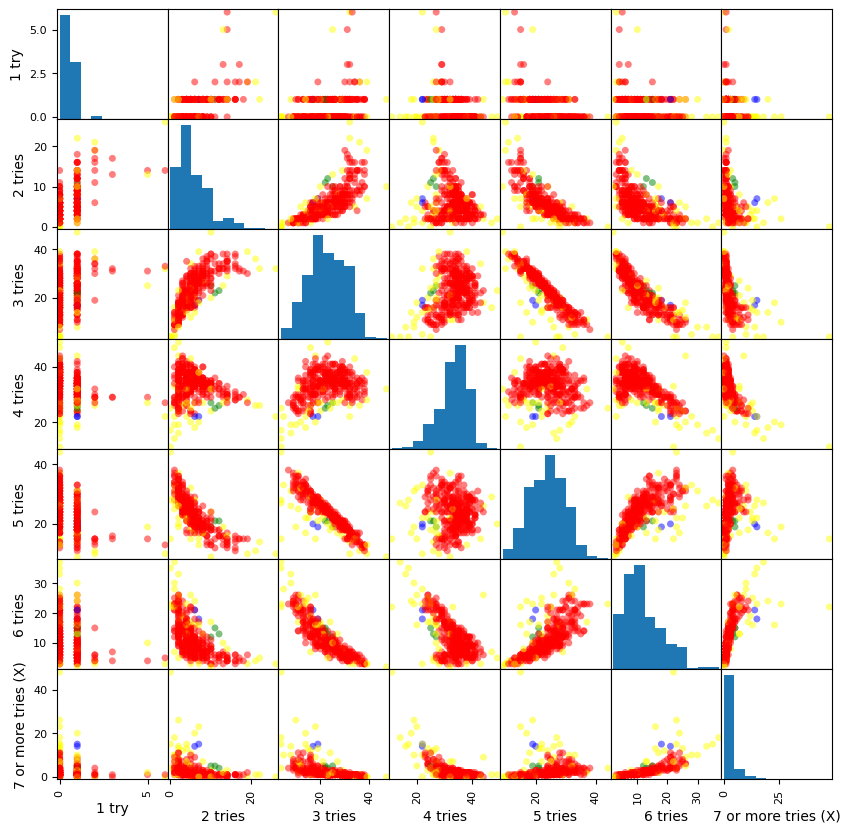

In [10]:
# 画出在不同两个指标下样本的分布情况
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red','green','blue','yellow'])
# print(pd.plotting.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100))
pd.plotting.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)
plt.show()

In [11]:
from sklearn import metrics  
# 就是下面这个函数可以计算轮廓系数
score = metrics.silhouette_score(X,beer.cluster_db) 
print(X)
print(beer.cluster_db)
print(score)

     1 try  2 tries  3 tries  4 tries  5 tries  6 tries  7 or more tries (X)
0        1        3       23       39       24        9                    1
1        1        5       23       31       24       14                    2
2        1        3       13       27       30       22                    4
3        1        4       16       30       30       17                    2
4        1        9       35       34       16        5                    1
..     ...      ...      ...      ...      ...      ...                  ...
349      0        2       17       35       29       14                    3
350      0        3       21       40       25        9                    1
351      0        2       16       38       30       12                    2
352      0        4       21       38       26        9                    1
353      0        2       17       37       29       12                    2

[354 rows x 7 columns]
0      0
1      0
2      0
3      0
4      0
      .

In [12]:
# 导入必要的库
import pandas as pd
from sklearn.cluster import DBSCAN

# 读取csv文件
df = pd.read_csv('./tries.csv')

# 取出多列数据
data = df[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]
print(data)

# 使用DBSCAN聚类
dbscan = DBSCAN(eps=4, min_samples=2).fit(data)

# 获取聚类标签
labels = dbscan.labels_

# 打印聚类结果
print(labels)

     1 try  2 tries  3 tries  4 tries  5 tries  6 tries  7 or more tries (X)
0        1        3       23       39       24        9                    1
1        1        5       23       31       24       14                    2
2        1        3       13       27       30       22                    4
3        1        4       16       30       30       17                    2
4        1        9       35       34       16        5                    1
..     ...      ...      ...      ...      ...      ...                  ...
349      0        2       17       35       29       14                    3
350      0        3       21       40       25        9                    1
351      0        2       16       38       30       12                    2
352      0        4       21       38       26        9                    1
353      0        2       17       37       29       12                    2

[354 rows x 7 columns]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('./tries.csv')

# 取出多列数据
data = df[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]

# 选择聚类方法：clique 类
from pyclustering.cluster.clique import clique
# clique 可视化
from pyclustering.cluster.clique import clique_visualizer

# 构建训练数据
f0 = np.array([37, 42, 49, 56, 61, 65])  # 体重
f1 = np.array([147, 154, 161, 165, 172, 177])  # 身高
f2 = np.array([9, 14, 20, 24, 30, 38])  # 年龄

# data = np.array([f0, f1, f2])
# data = data.T
data_M = np.array(data)

# 创建 CLIQUE 算法进行处理
# 定义每个维度中网格单元的数量
intervals = 5
# 密度阈值
threshold = 0
clique_instance = clique(data_M, intervals, threshold)

# 开始聚类过程并获得结果
clique_instance.process()
clique_cluster = clique_instance.get_clusters()  # allocated clusters

# 被认为是异常值的点（噪点）
noise = clique_instance.get_noise()
# CLIQUE形成的网格单元
cells = clique_instance.get_cells() 

print("Amount of clusters:", len(clique_cluster))
print(clique_cluster)

# # 显示由算法形成的网格
# clique_visualizer.show_grid(cells, data_M) 
# # 显示聚类结果
# clique_visualizer.show_clusters(data_M, clique_cluster, noise)  # show clustering results


Amount of clusters: 13
[[224, 92], [116], [259, 25, 46, 76, 109, 146, 257, 282, 313, 73, 346, 12, 67, 85, 299, 305, 51, 237, 250, 252, 121, 155, 306, 319, 26, 157, 302, 328, 342, 4, 8, 169, 253, 271, 323, 333, 9, 10, 14, 139, 268, 326, 210, 105, 339, 52, 58, 59, 62, 70, 93, 101, 125, 126, 130, 159, 186, 226, 233, 258, 265, 270, 287, 298, 336, 20, 28, 123, 162, 318, 163, 202, 256, 327, 343, 13, 18, 22, 37, 55, 64, 107, 110, 133, 134, 138, 142, 148, 178, 194, 221, 229, 230, 239, 244, 260, 267, 281, 289, 291, 293, 303, 310, 315, 321, 322, 331, 338, 24, 34, 38, 39, 45, 54, 57, 115, 152, 185, 201, 204, 309, 340, 16, 61, 77, 95, 135, 140, 153, 156, 174, 192, 195, 234, 249, 276, 283, 285, 296, 307, 335, 170, 183, 215, 106, 143, 345, 27, 114, 330, 96, 314, 0, 119, 136, 166, 181, 191, 208, 212, 261, 284, 304, 308, 50, 36, 97, 151, 160, 167, 1, 198, 48, 141, 164, 182, 255, 222, 279, 99, 150, 220, 228, 236, 248, 263, 350, 352, 19, 29, 33, 65, 75, 129, 147, 158, 223, 264, 278, 292, 7, 15, 30, 35, 

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('./tries.csv')

# 取出多列数据
# data1 = df[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]
f0=np.array(df['1 try'])
f1=np.array(df['2 tries'])
f2=np.array(df['3 tries'])
f3=np.array(df['4 tries'])
f4=np.array(df['5 tries'])
f5=np.array(df['6 tries'])
f6=np.array(df['7 or more tries (X)'])
data=np.array([f0,f1,f2,f3,f4,f5])

# 选择聚类方法：clique 类
from pyclustering.cluster.clique import clique
# clique 可视化
from pyclustering.cluster.clique import clique_visualizer
from pyclustering.cluster import cluster_visualizer,cluster_visualizer_multidim

# 构建训练数据
data = data.T
print(data)
data_M = np.array(data)

# 创建 CLIQUE 算法进行处理
# 定义每个维度中网格单元的数量
intervals = 5
# 密度阈值
threshold = 0
clique_instance = clique(data_M, intervals, threshold)

# 开始聚类过程并获得结果
clique_instance.process()
clique_cluster = clique_instance.get_clusters()  # allocated clusters

# 被认为是异常值的点（噪点）
noise = clique_instance.get_noise()
# CLIQUE形成的网格单元
cells = clique_instance.get_cells() 

print("Amount of clusters:", len(clique_cluster))
print(clique_cluster)


[[ 1  3 23 39 24  9]
 [ 1  5 23 31 24 14]
 [ 1  3 13 27 30 22]
 ...
 [ 0  2 16 38 30 12]
 [ 0  4 21 38 26  9]
 [ 0  2 17 37 29 12]]
Amount of clusters: 12
[[224, 92], [116], [259, 25, 46, 76, 109, 146, 257, 282, 313, 73, 346, 12, 67, 85, 299, 305, 51, 237, 250, 252, 121, 155, 306, 319, 26, 157, 302, 328, 342, 4, 8, 169, 253, 271, 323, 333, 9, 10, 14, 139, 268, 326, 210, 105, 339, 52, 58, 59, 62, 70, 93, 101, 125, 126, 130, 159, 186, 226, 233, 258, 265, 270, 287, 298, 336, 20, 28, 123, 162, 318, 163, 202, 256, 327, 343, 13, 18, 22, 37, 55, 64, 107, 110, 133, 134, 138, 142, 148, 178, 194, 221, 229, 230, 239, 244, 260, 267, 281, 289, 291, 293, 303, 310, 315, 321, 322, 331, 338, 24, 34, 38, 39, 45, 54, 57, 115, 152, 185, 201, 204, 309, 340, 16, 61, 77, 95, 135, 140, 153, 156, 174, 192, 195, 234, 249, 276, 283, 285, 296, 307, 335, 170, 183, 215, 106, 143, 345, 27, 114, 330, 96, 314, 0, 119, 136, 166, 181, 191, 208, 212, 261, 284, 304, 308, 50, 36, 97, 151, 160, 167, 1, 198, 48, 141, 164, 18

d:\Downloads\MyApp\Anaconda\envs\mathematical_modeling\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Downloads\MyApp\Anaconda\envs\mathematical_modeling\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



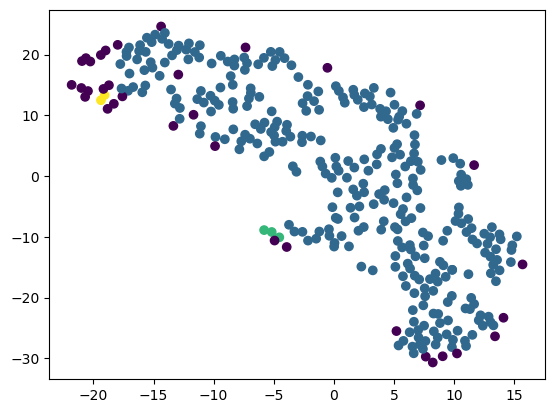

In [15]:
import pandas as pd
dfx=pd.read_csv('./label.csv')
X=dfx[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# labels = kmeans.labels_

model = TSNE(n_components=2, random_state=0)
X_tsne = model.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)

In [16]:
import plotly.express as px
import pandas as pd
dfk=pd.read_excel('./kmeans++.xlsx')
# df = px.data.wind()
fig = px.scatter_polar(dfk, r="data", theta="tries", color="category",width=600,height=600)
fig.show()
# fig = px.scatter_polar(dfk, r="Data", theta="Tries", color="Category",width=500)
# fig.show()
# fig = px.bar_polar(dfk, r="data", theta="tries", color="category",width=500,template="plotly_dark")
# fig.show()

In [17]:
fig = px.bar(dfk, x="Word Categories", y="Numbers", color="Word Categories",width=600,height=600)
fig.show()

In [18]:
import heapq
import pandas as pd
import numpy as np

# 常用词集合导入
df_word=pd.read_excel('./five_letter_words.xlsx')
s=set(df_word['Word'])
df_word1=pd.read_excel('./other_word.xlsx')
s1=set(df_word1['Word'])
s1={word.lower() for word in s1}
s.update(s1)

# 计算常用五字母词各位上字母分布
# count[0][1]表示字母a在第二位的占比
count = np.zeros([30,10])
for i in range(0,5):
    for word in s:
        count[ord(word[i])-ord('a')][i]+=1

for i in range (0,26):
    for j in range(0,5):
        count[i][j]/=len(s)
dd=pd.DataFrame(count)
dd.to_excel('./u.xlsx')

In [19]:
import heapq
import pandas as pd
import numpy as np

# 常用词集合导入
df_word=pd.read_excel('./five_letter_words.xlsx')
s=set(df_word['Word'])
df_word1=pd.read_excel('./other_word.xlsx')
s1=set(df_word1['Word'])
s1={word.lower() for word in s1}
s.update(s1)

# 计算常用五字母词各位上字母分布
# count[0][1]表示字母a在第二位的占比
count = np.zeros([30,10])
for i in range(0,5):
    for word in s:
        count[ord(word[i])-ord('a')][i]+=1

for i in range (0,26):
    for j in range(0,5):
        count[i][j]/=len(s)

# ans=pd.DataFrame(count)
# ans.to_excel('ptest.xlsx', index=False)
# print("set_size:",len(s))

# 导入游戏单词集合
df_all_word=pd.read_excel('./c.xlsx')
s_all=set(df_all_word['Word'])
s_all={word for word in s_all if len(word) == 5}
s_all={word for word in s_all if all(c in 'abcdefghijklmnopqrstuvwxyz' for c in word)}


def countVowels(str): 
    vowels = 0
    pos = 0
    cnt=1
    for i in str: 
        if (i == 'a' or i == 'e' or i == 'i' or i == 'o' or i == 'u'): 
            vowels = vowels + 1
            if pos==0:
                pos=cnt
        cnt+=1
    return [vowels,pos]

# import openpyxl module
import openpyxl

# create a new workbook
wb = openpyxl.Workbook()
# select the active sheet
sheet = wb.active
# add data to column A
i=1
sheet['A'+'1']='Word'
sheet['B'+'1']='repeat_num'
sheet['C'+'1']='usual_p_add'
sheet['D'+'1']='vowel_num'
sheet['E'+'1']='usual_or_not'
sheet['F'+'1']='1st_vowel_pos'
for word in s_all:
    i+=1
    if word!='eerie':
        continue
    sheet['A'+str(i)] = word
    sheet['B'+str(i)] = len(word)-len(set(word))
    arr = np.array([count[ord(word[0])-ord('a')][0],count[ord(word[1])-ord('a')][1],
    count[ord(word[2])-ord('a')][2],count[ord(word[3])-ord('a')][3],count[ord(word[4])-ord('a')][4]])
    sheet['C'+str(i)]=sum(heapq.nlargest(3, arr))
    sheet['D'+str(i)]=countVowels(word)[0]
    if word in s:
        sheet['E' + str(i)] = 1
    else:
        sheet['E' + str(i)] = 0
    sheet['F'+str(i)]=countVowels(word)[1]
# save the workbook



wb.save('feature.xlsx')